<a href="https://colab.research.google.com/github/Jannah58/House_price_prediction/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("CC GENERAL.csv")


# **Data Exploring**

In [ ]:
#no of rows and columns
df.shape

(8950, 18)

In [ ]:
#print first 5 rows
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

 **Cust_ID is an object (categorical data) we will not be needing it for model**

In [ ]:
#dropping cust_id
df = df.drop(['CUST_ID'],axis=1)

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**Data seems to be skewed as there is large diffrence between mean and std.**

**We need to check if there is null values or not**


In [ ]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

**We discovered that there is nulls in MINIMUM_PAYMENTS and CREDIT_LIMIT .**

# **imputing null values** 

we have two options either to replace them with mean 
or median but by doing further analysis there are lots of outliers and data is skewed in both columns so it is better to use median

In [ ]:
df['MINIMUM_PAYMENTS']= df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())

In [ ]:
df['CREDIT_LIMIT']=df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())

**Let's check again**

In [ ]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Visualizing Data

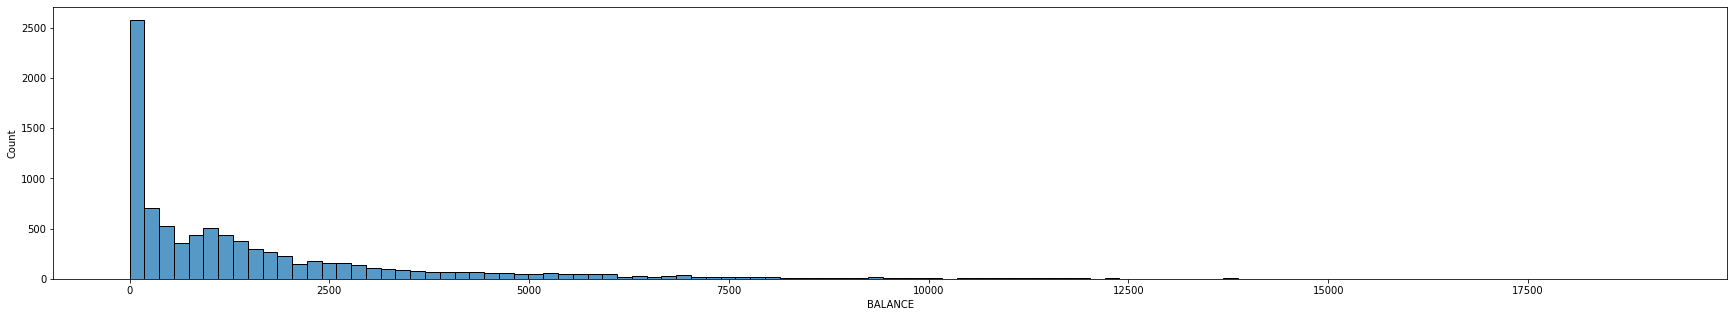

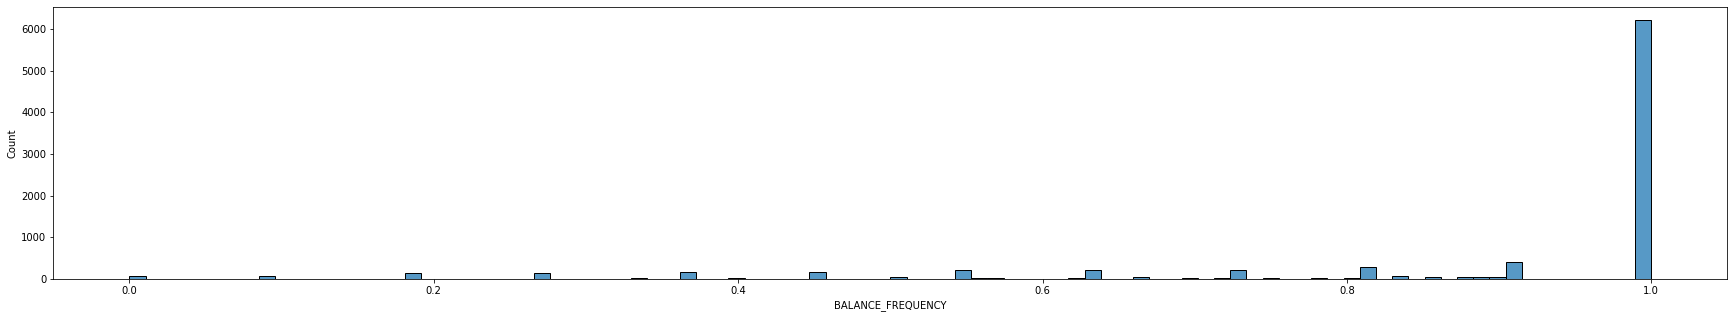

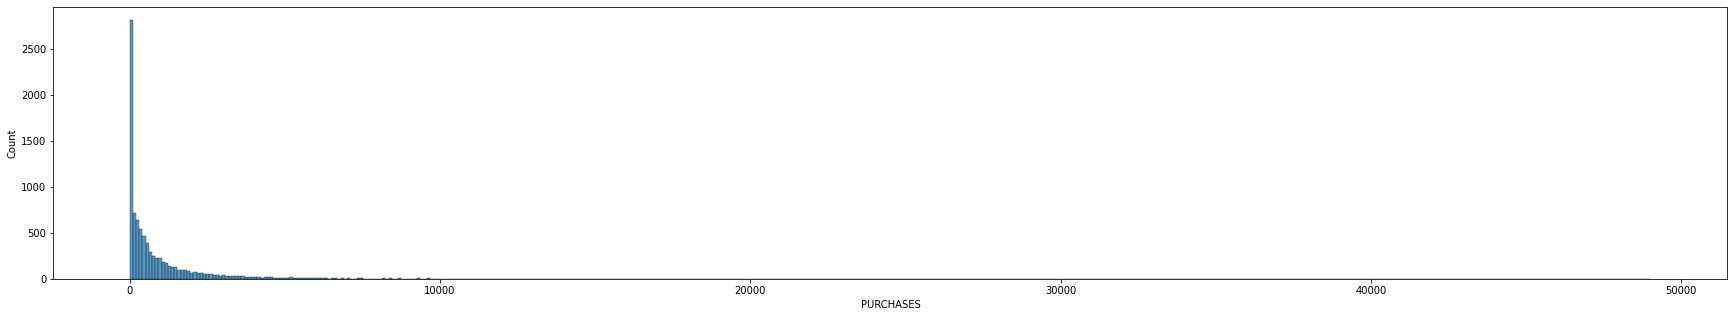

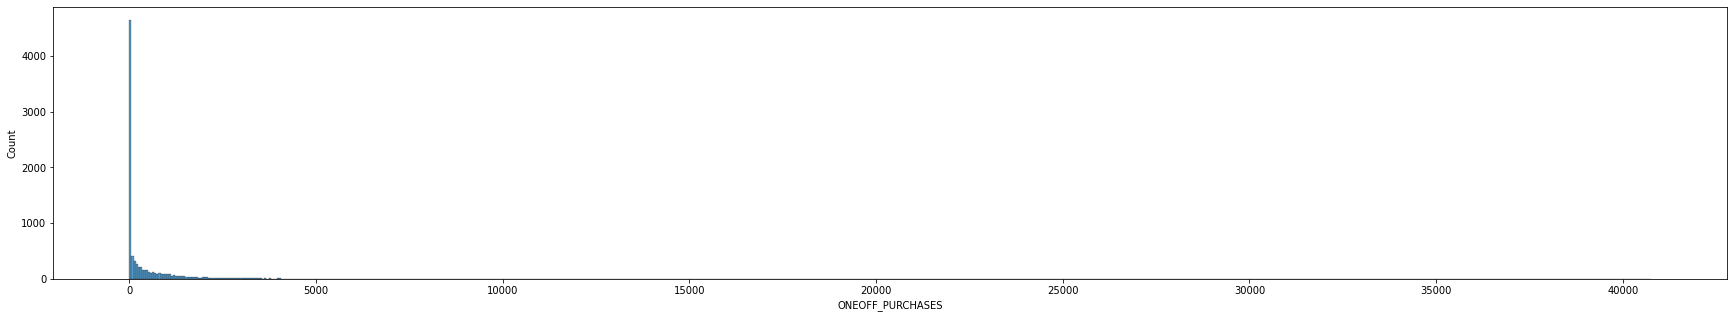

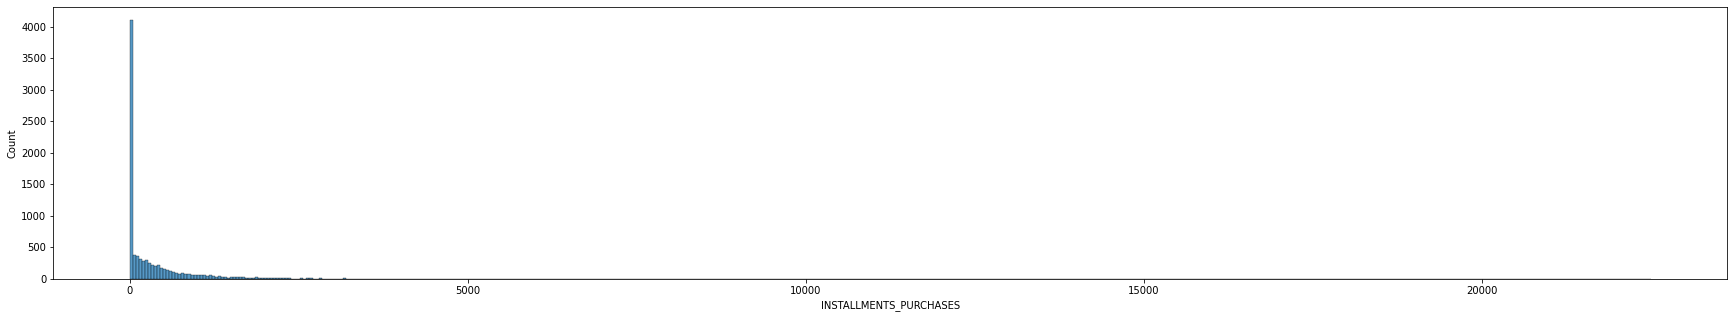

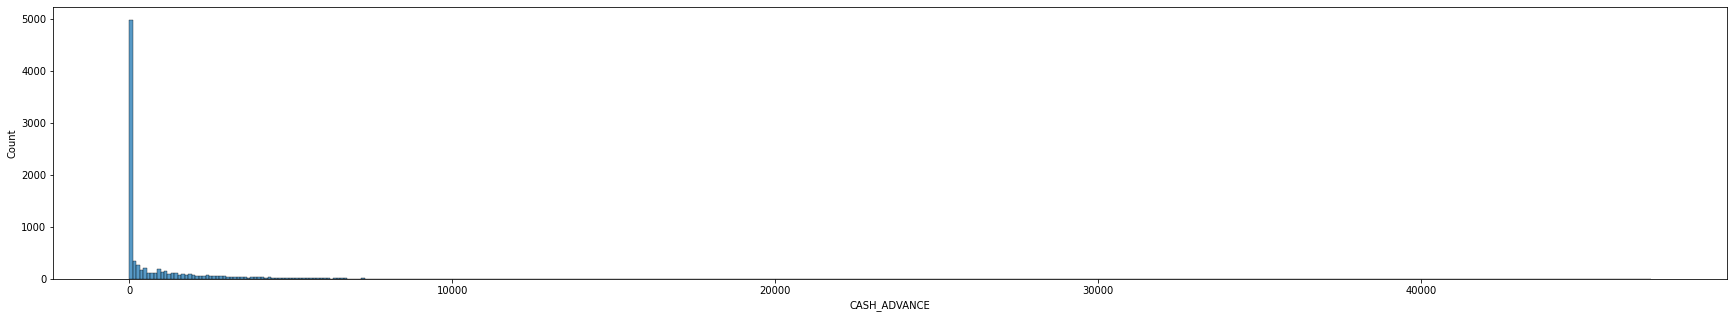

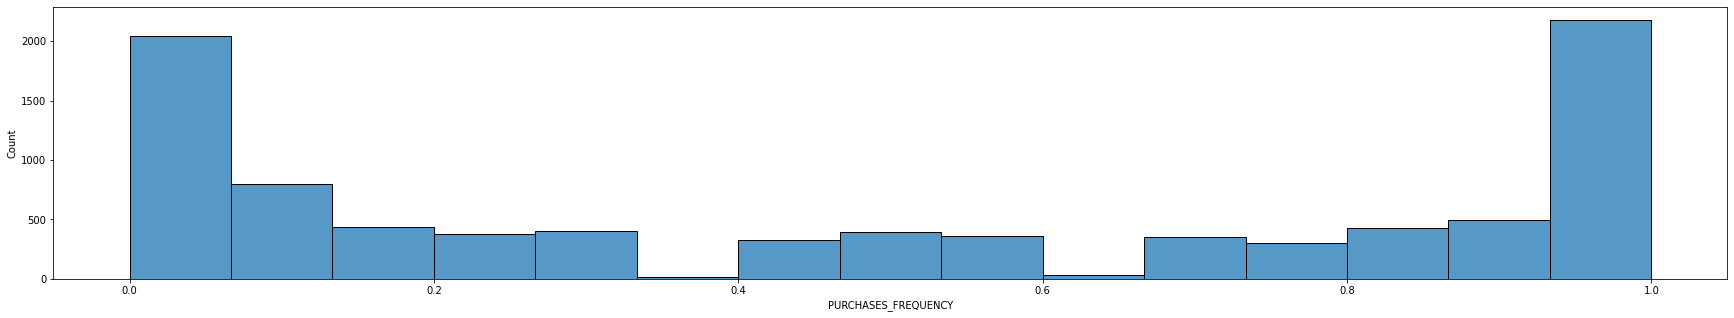

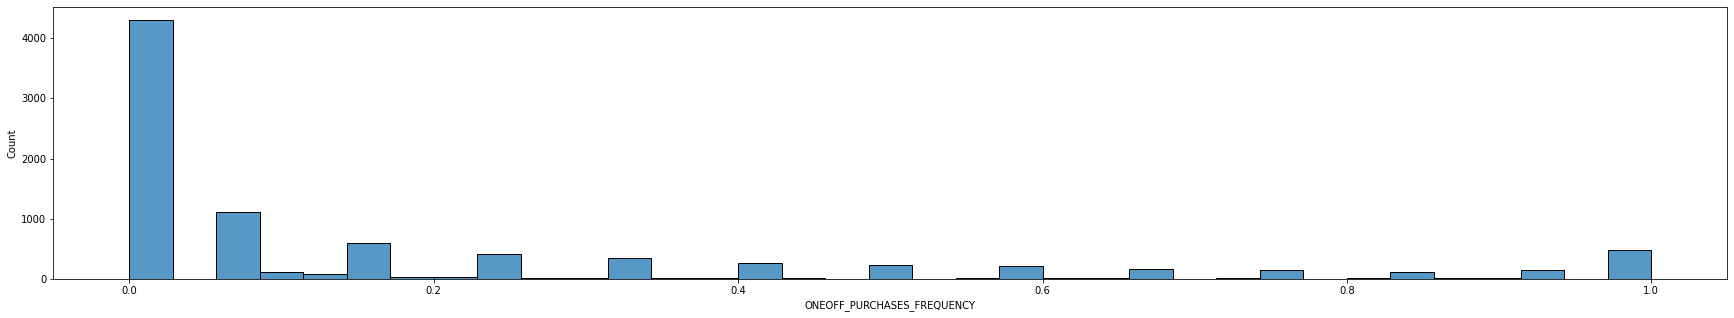

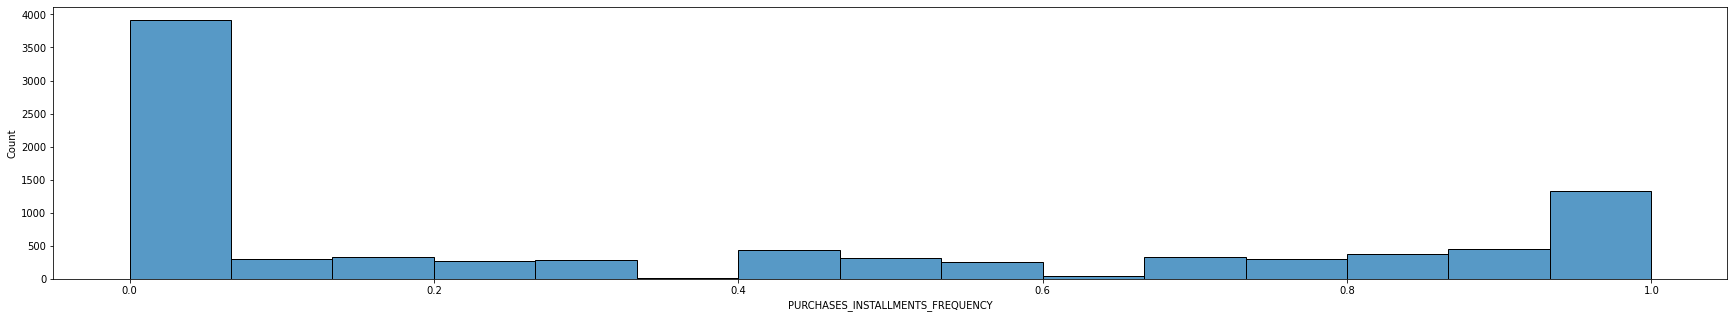

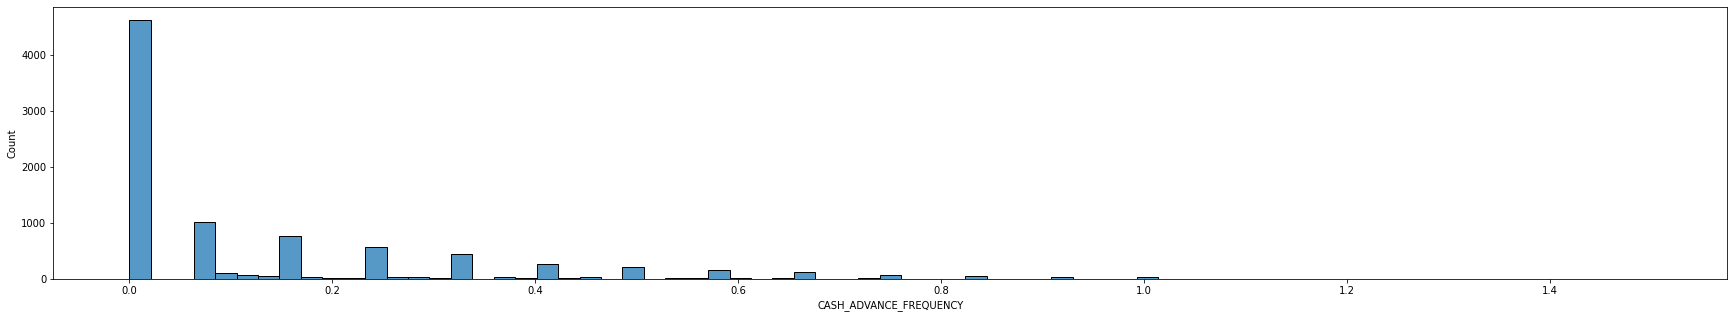

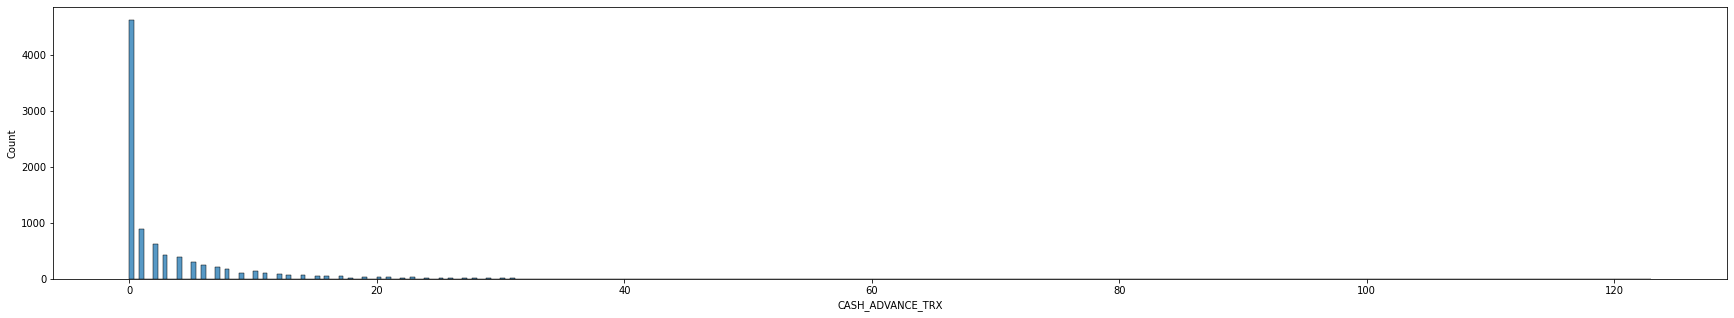

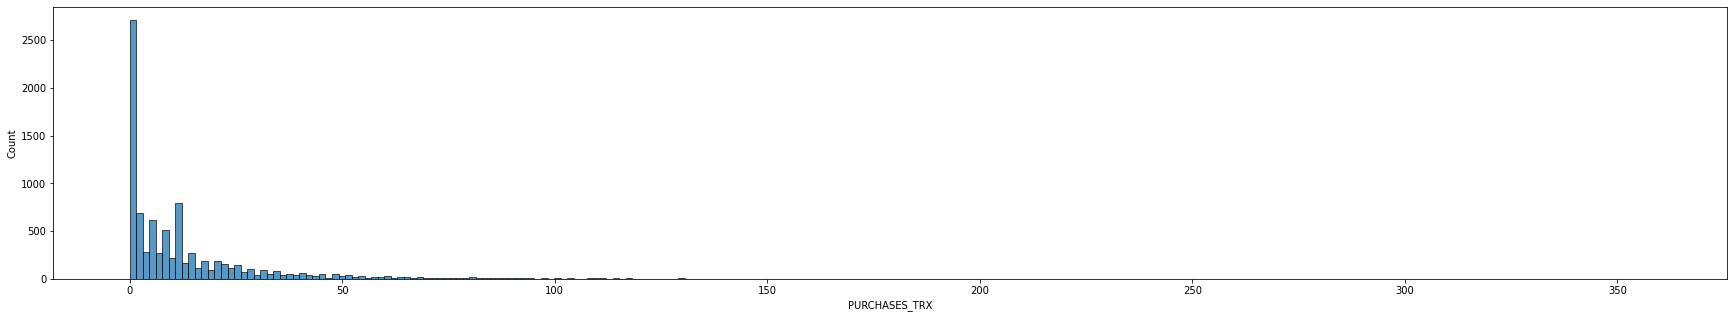

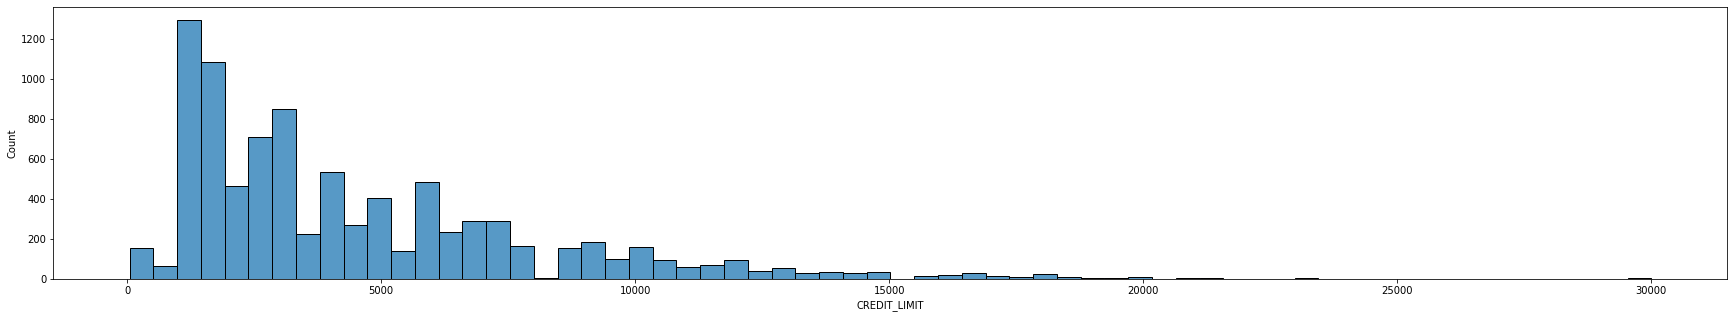

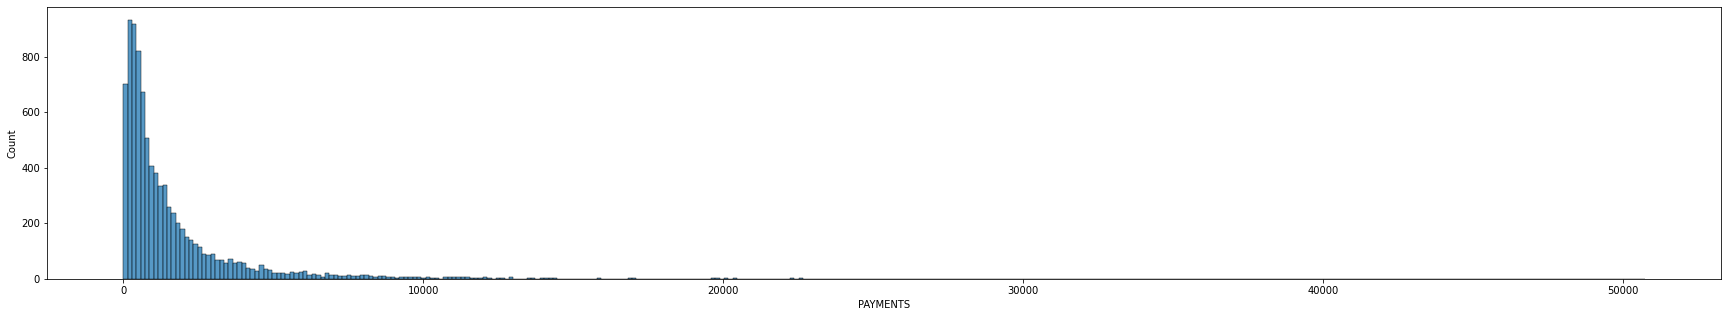

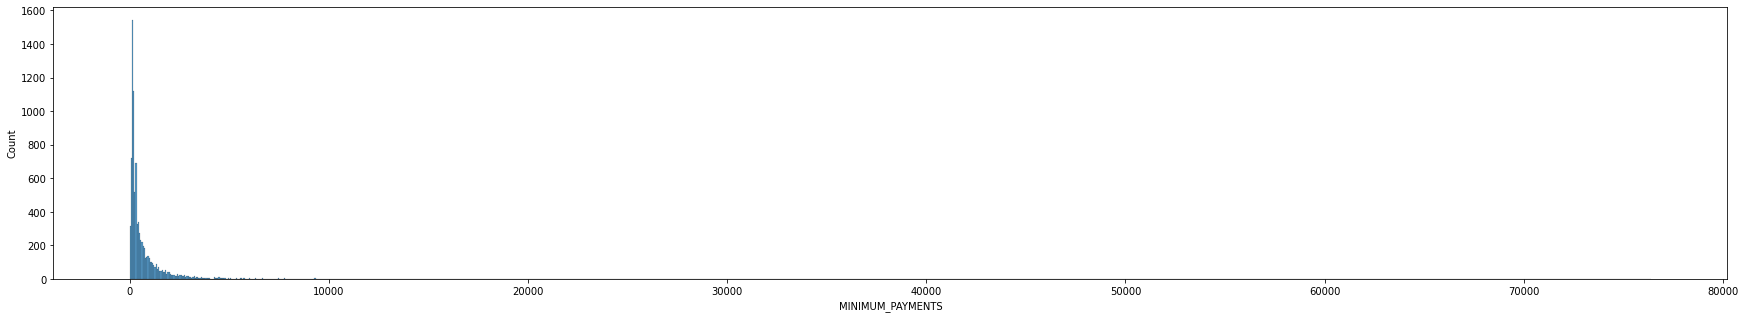

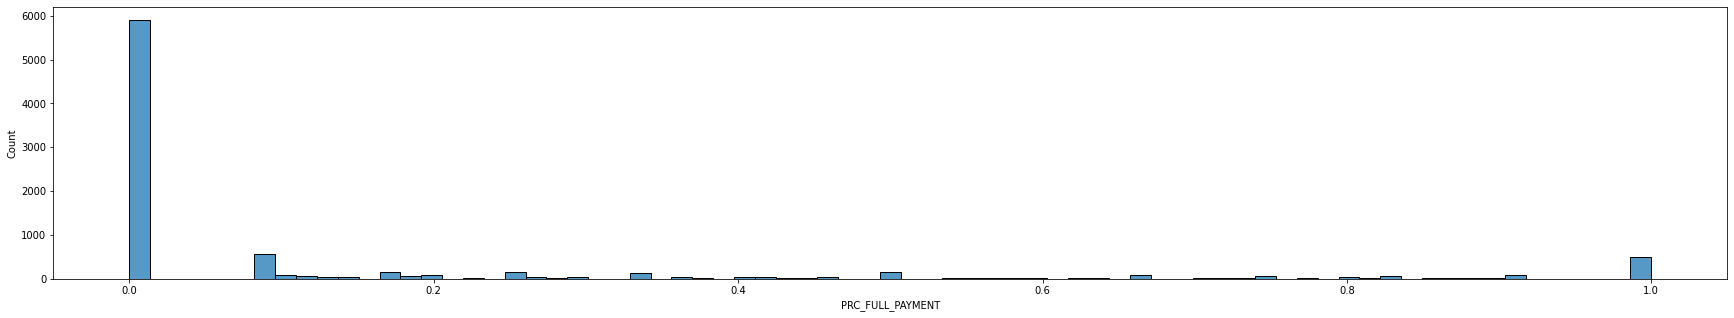

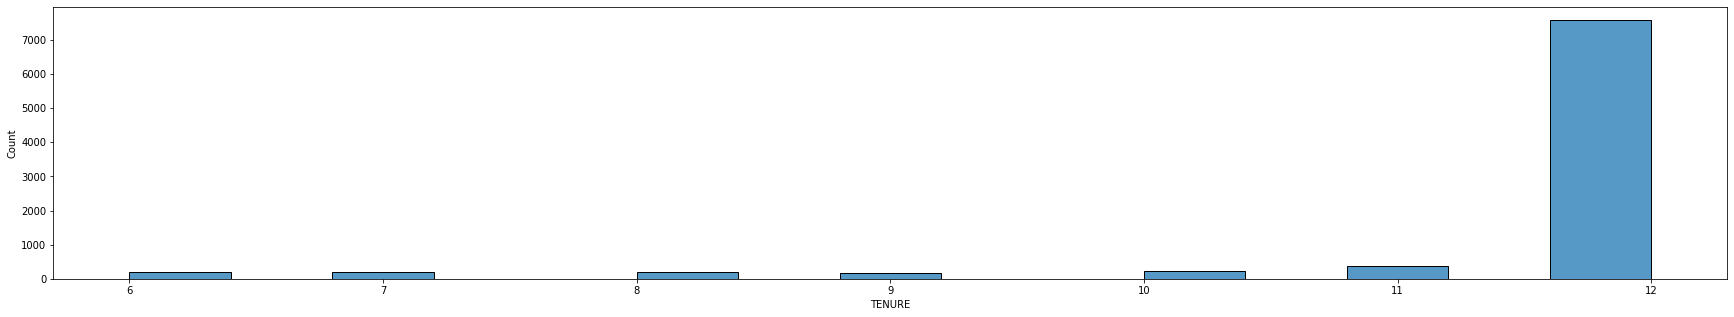

In [ ]:
for column in df.columns:
    plt.figure(figsize = (30,5))
    sns.histplot(df[column])
    plt.show()




1.   Most people balance lie below 7500 .
2.   Most Purchases are below 10k.
3.   Most people have low credit limit.
4.   Installment purchases happen more frequently than one off purchases.
5.   Cash advance is low.
6.   Average Tenure is 12.
7.Most people haven't paid full payment.







It is confirmed that data is scewed in some columns

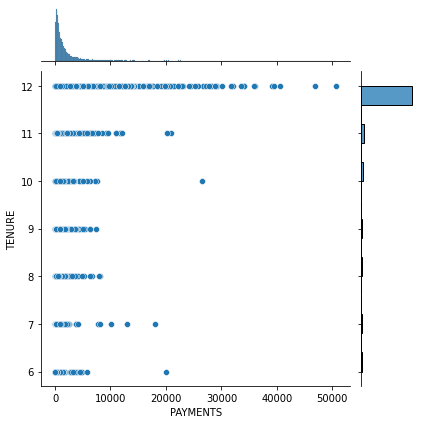

In [ ]:
sns.jointplot(x='PAYMENTS',y='TENURE',data=df , kind='scatter')

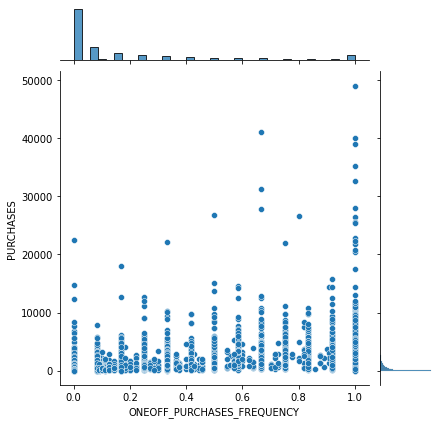

In [ ]:
sns.jointplot(x='ONEOFF_PURCHASES_FREQUENCY',y='PURCHASES',data=df , kind='scatter')

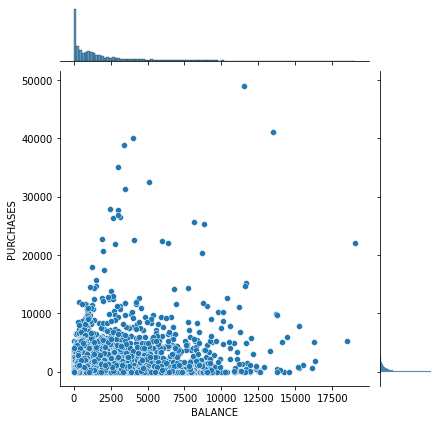

In [ ]:
sns.jointplot(x='BALANCE',y='PURCHASES',data=df , kind='scatter')

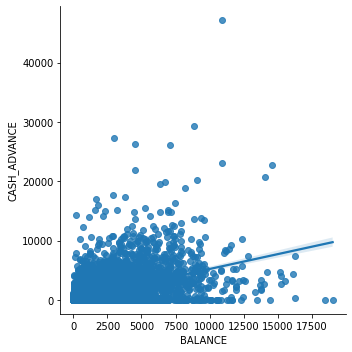

In [ ]:
sns.lmplot(x='BALANCE',y='CASH_ADVANCE',data=df)

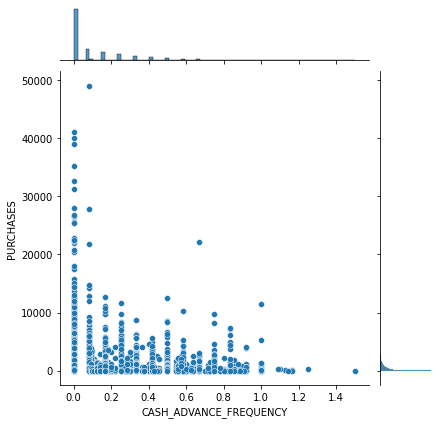

In [ ]:

sns.jointplot(x='CASH_ADVANCE_FREQUENCY',y='PURCHASES',data=df , kind='scatter')

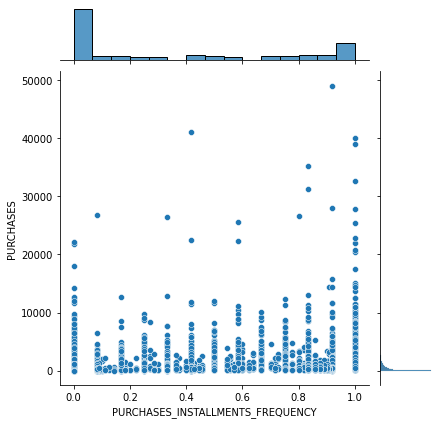

In [ ]:
sns.jointplot(x='PURCHASES_INSTALLMENTS_FREQUENCY',y='PURCHASES',data=df , kind='scatter')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


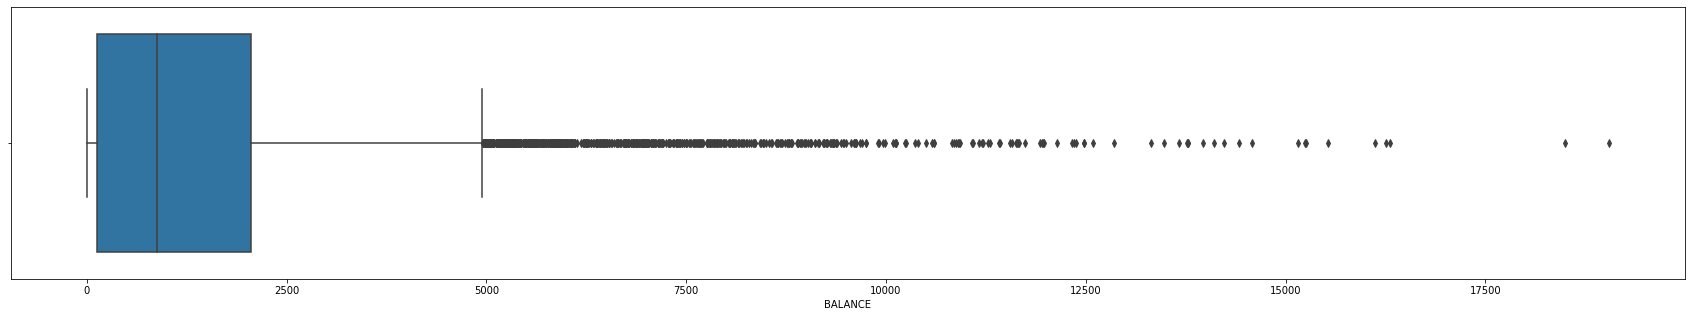

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


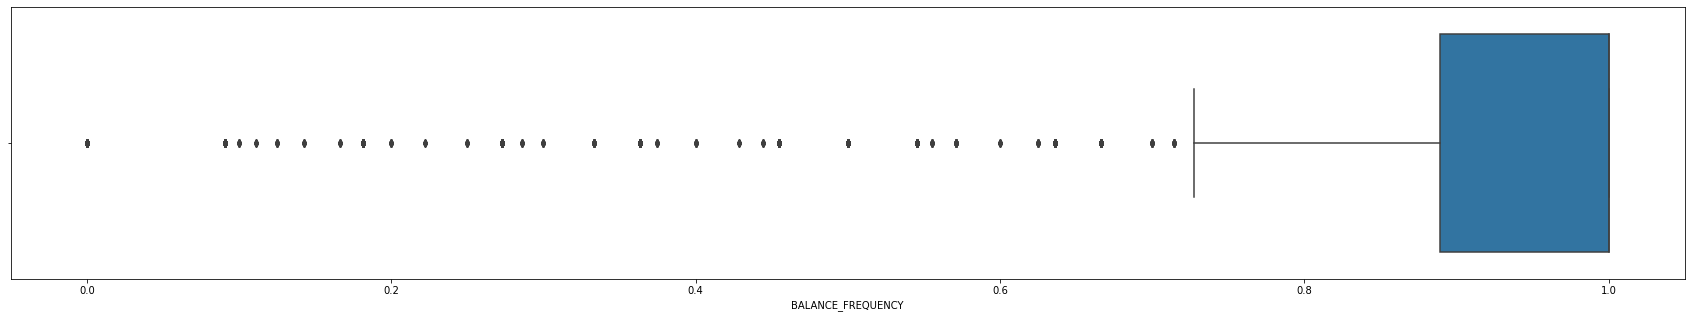

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


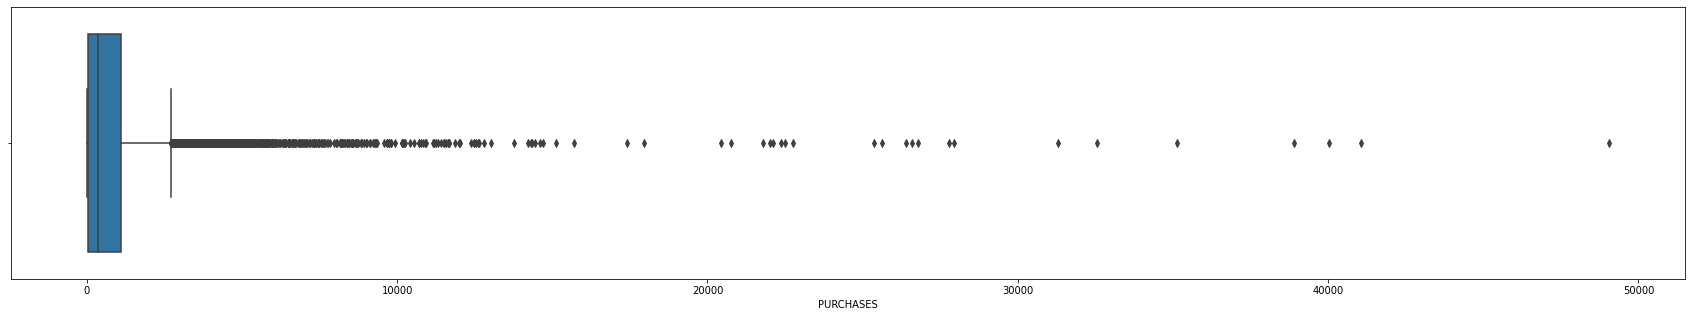

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


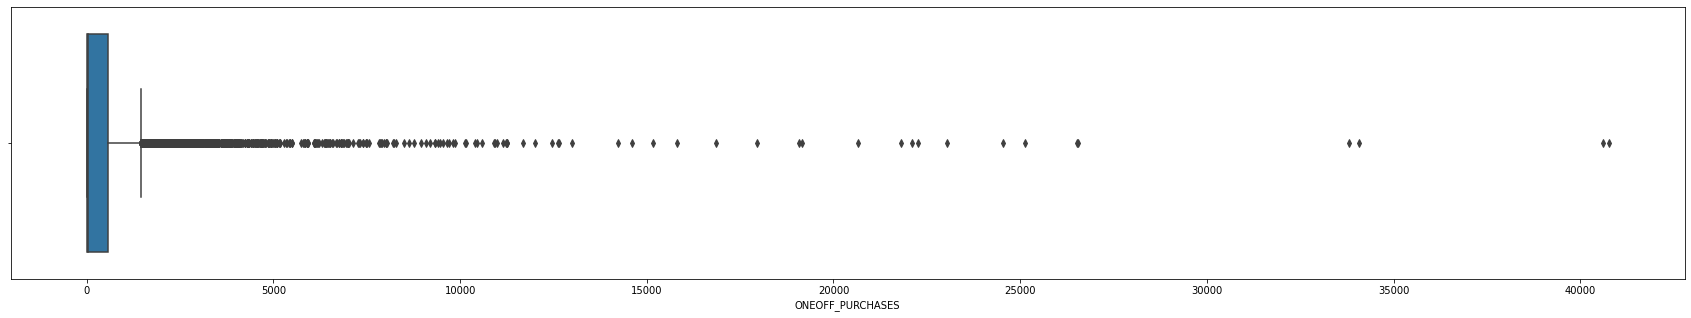

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


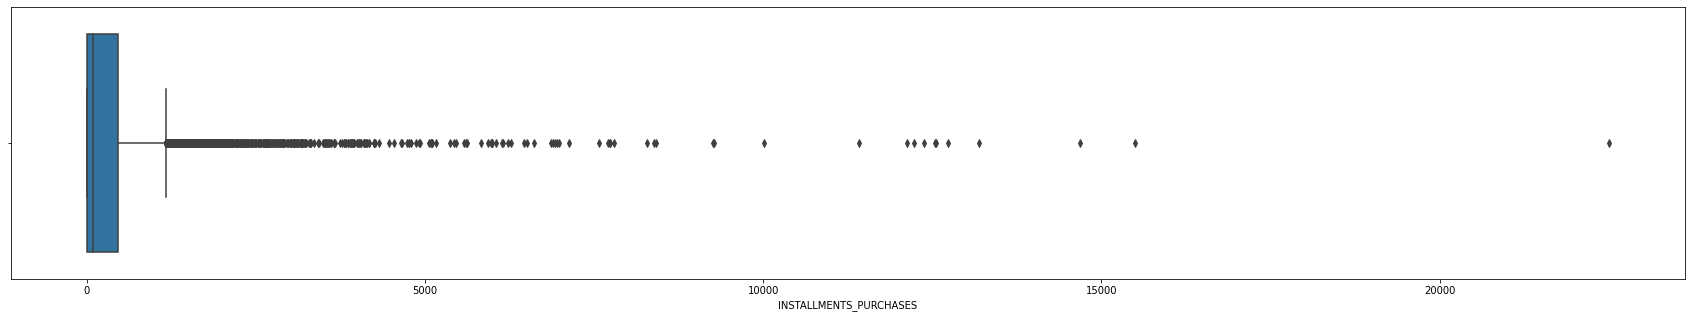

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


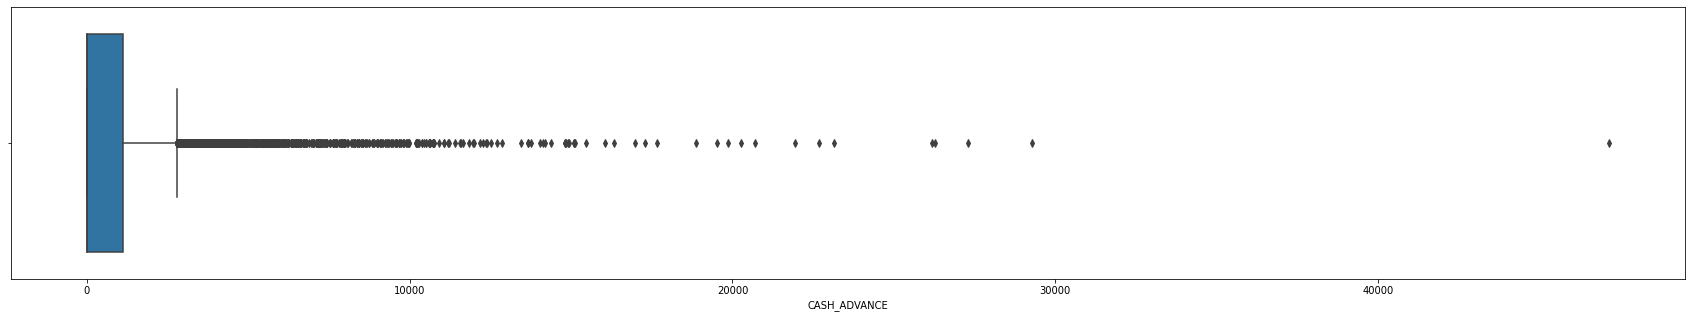

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


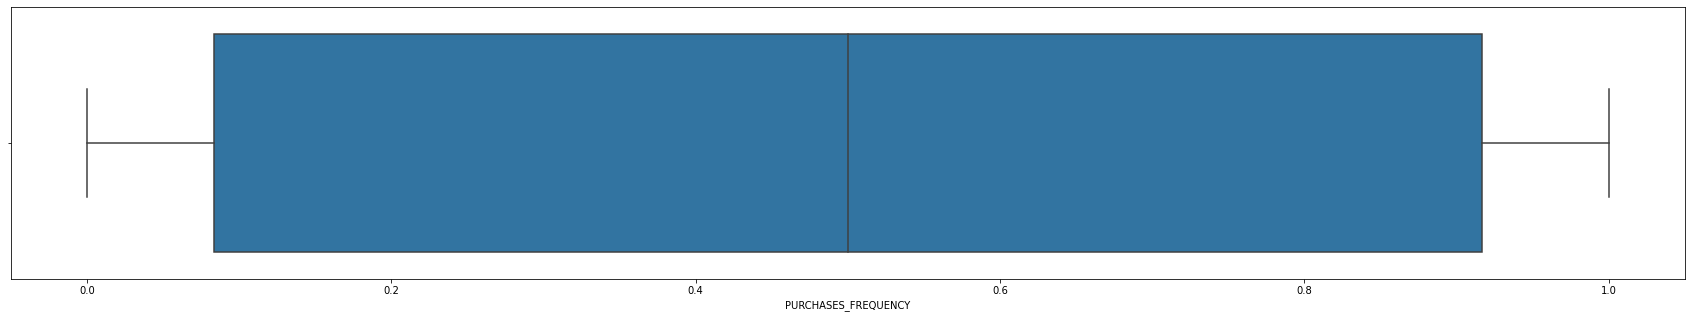

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


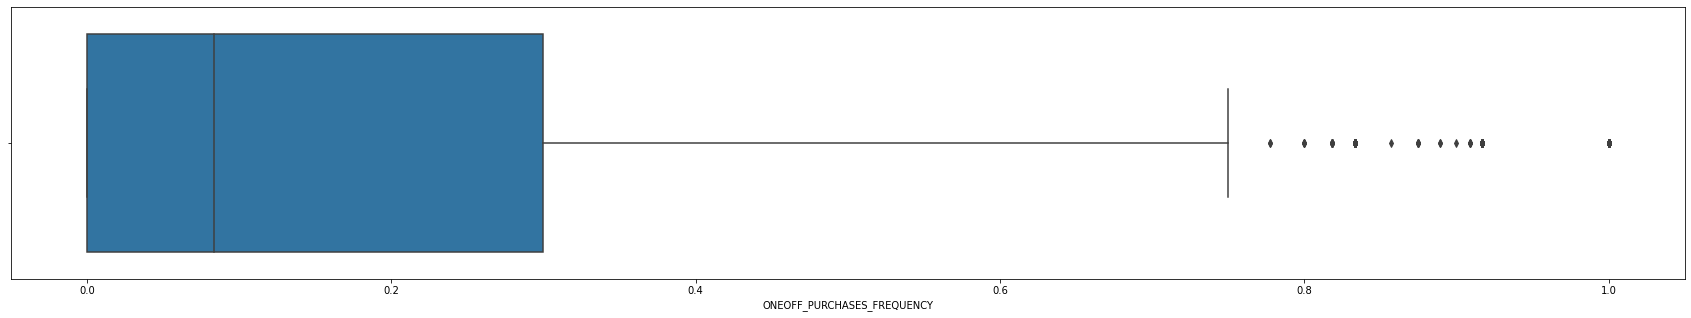

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


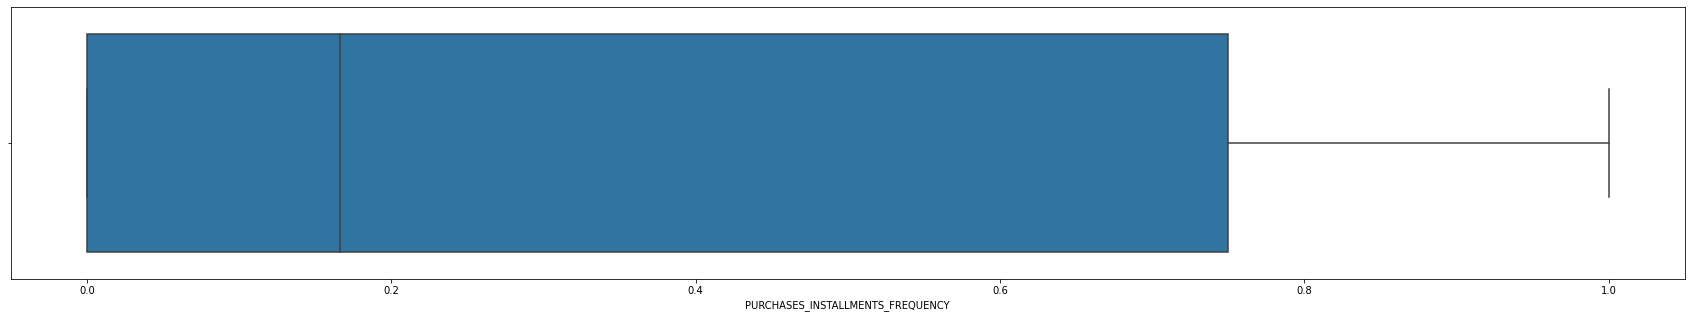

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


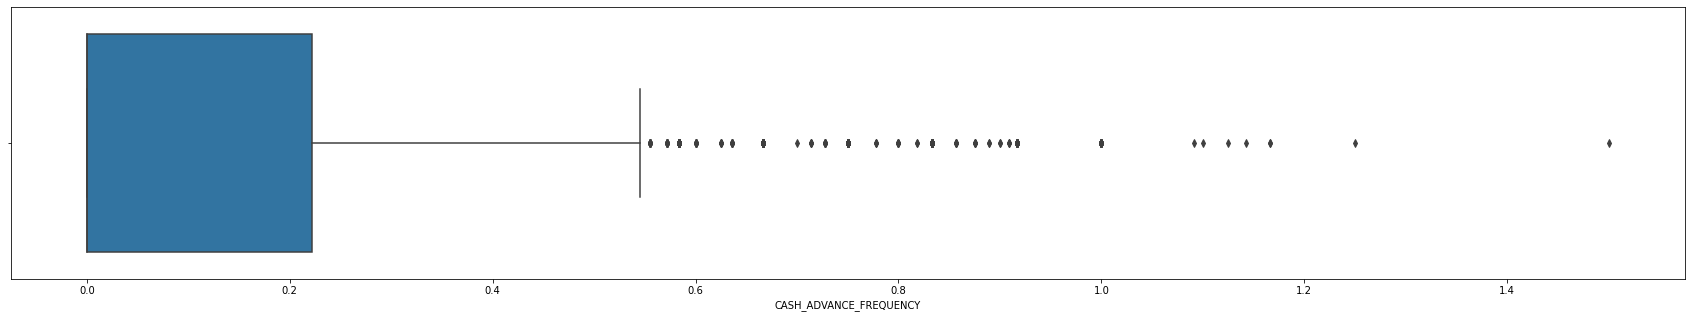

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


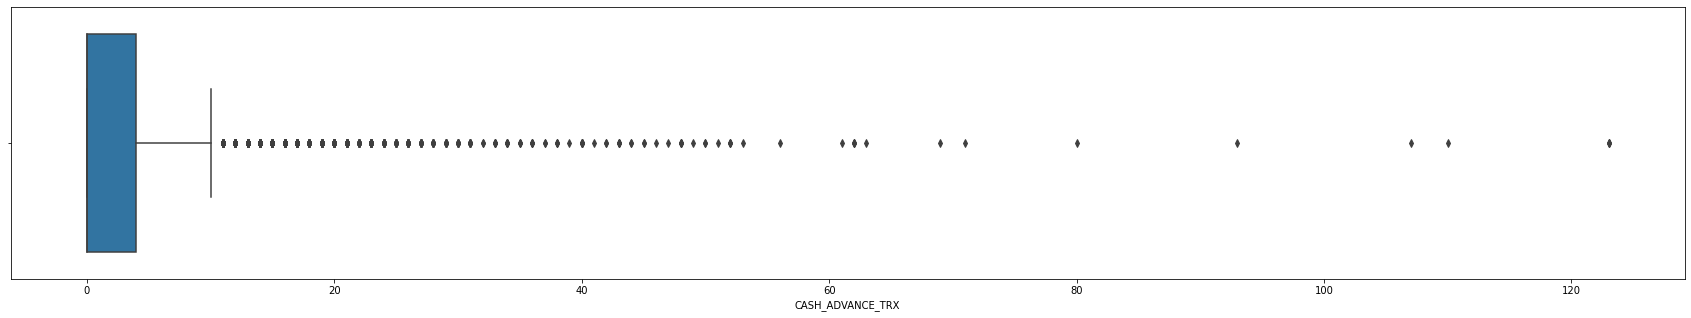

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


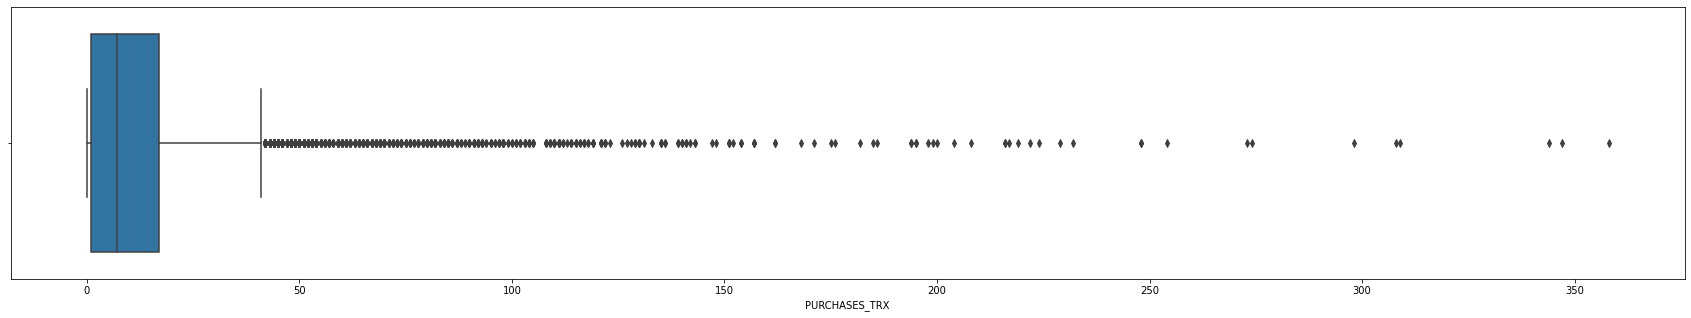

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


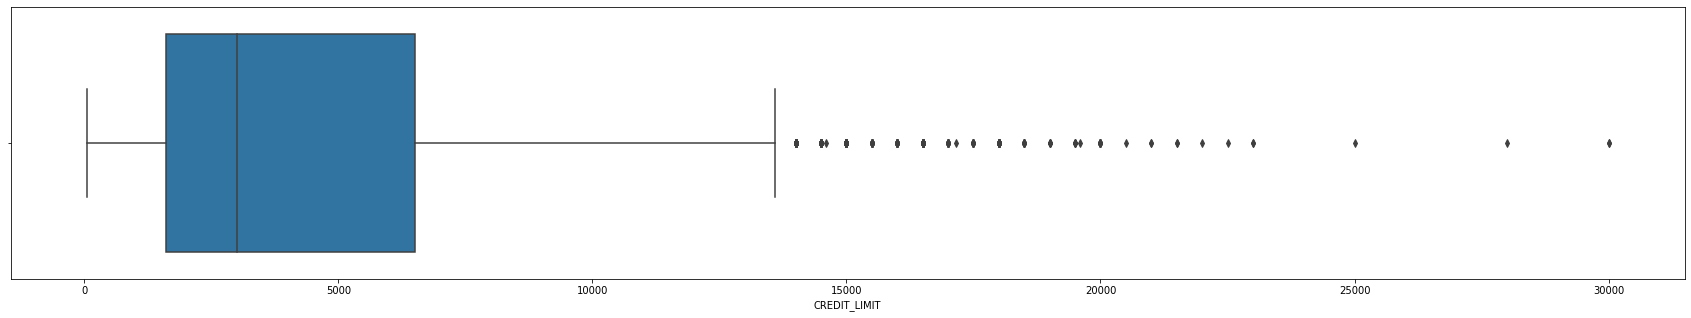

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


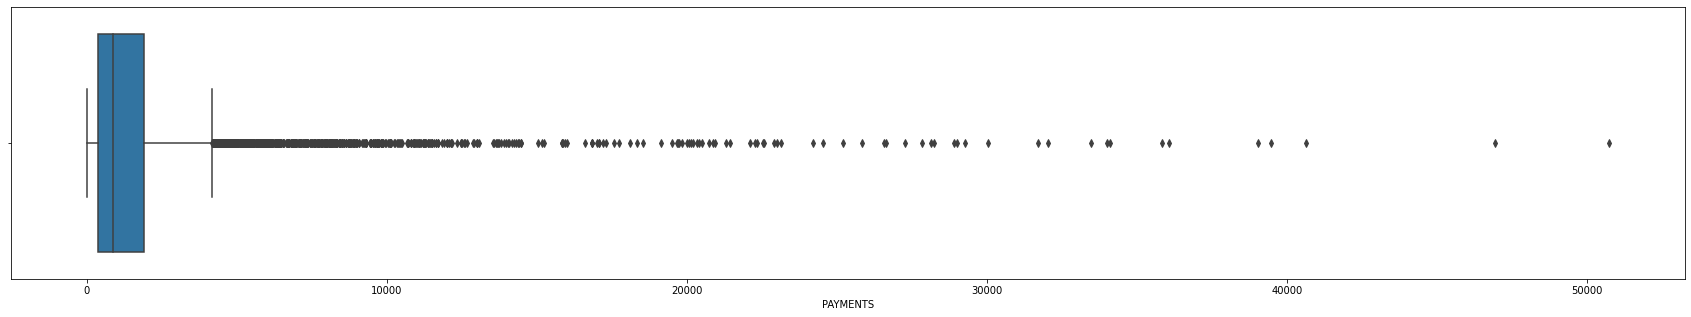

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


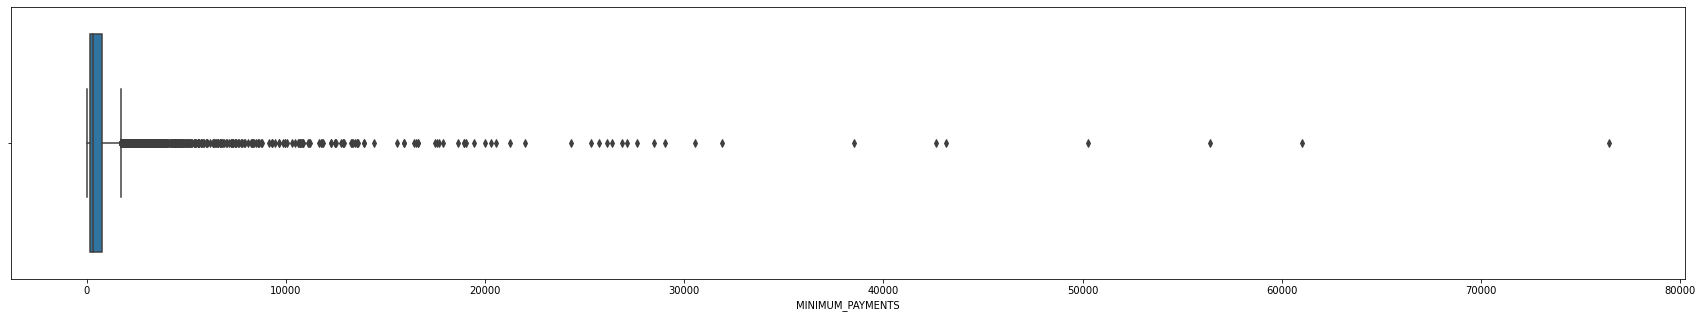

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


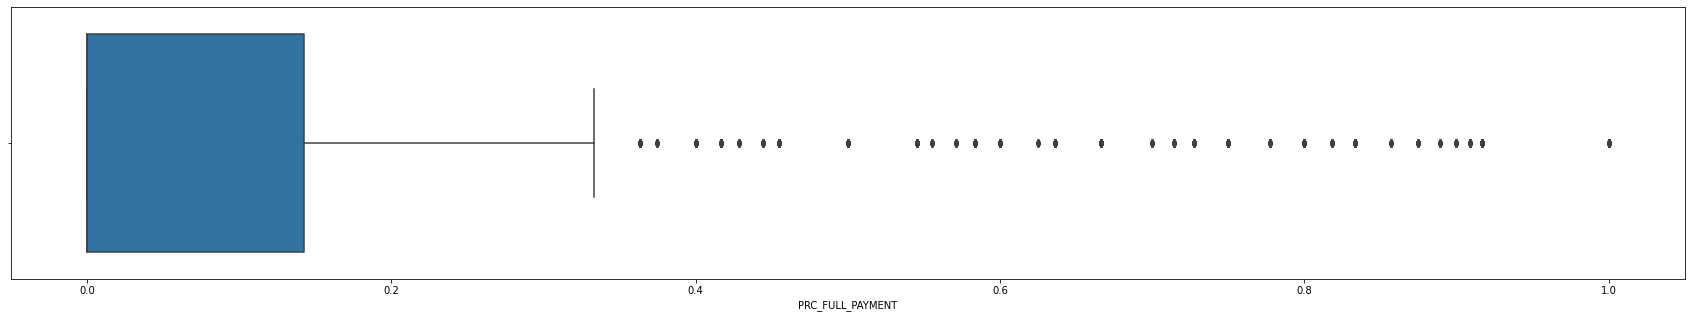

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


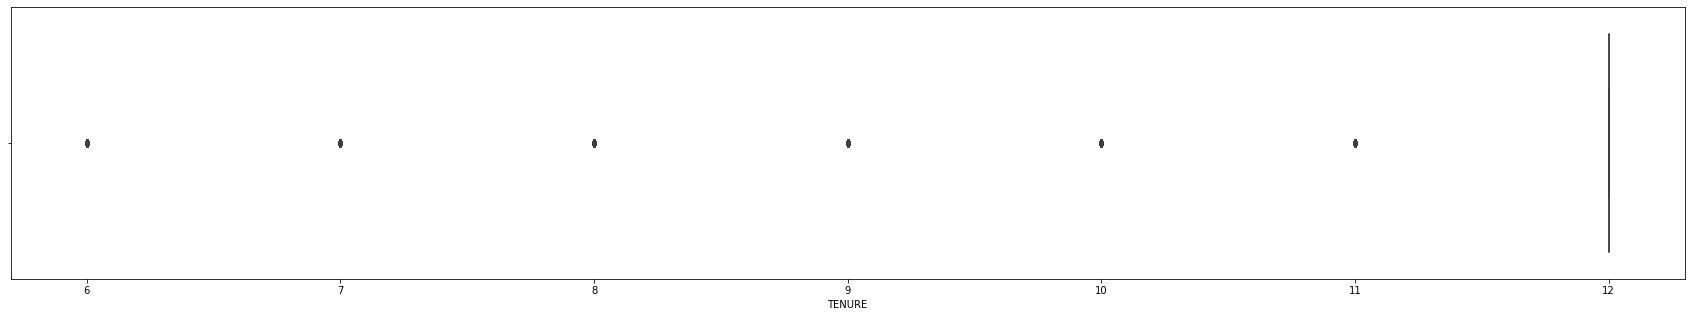

In [ ]:
for column in df.columns:
    plt.figure(figsize = (30,5))
    sns.boxplot(df[column])
    plt.show()

There are lots of outliers we can't remove them bec they represent real data.

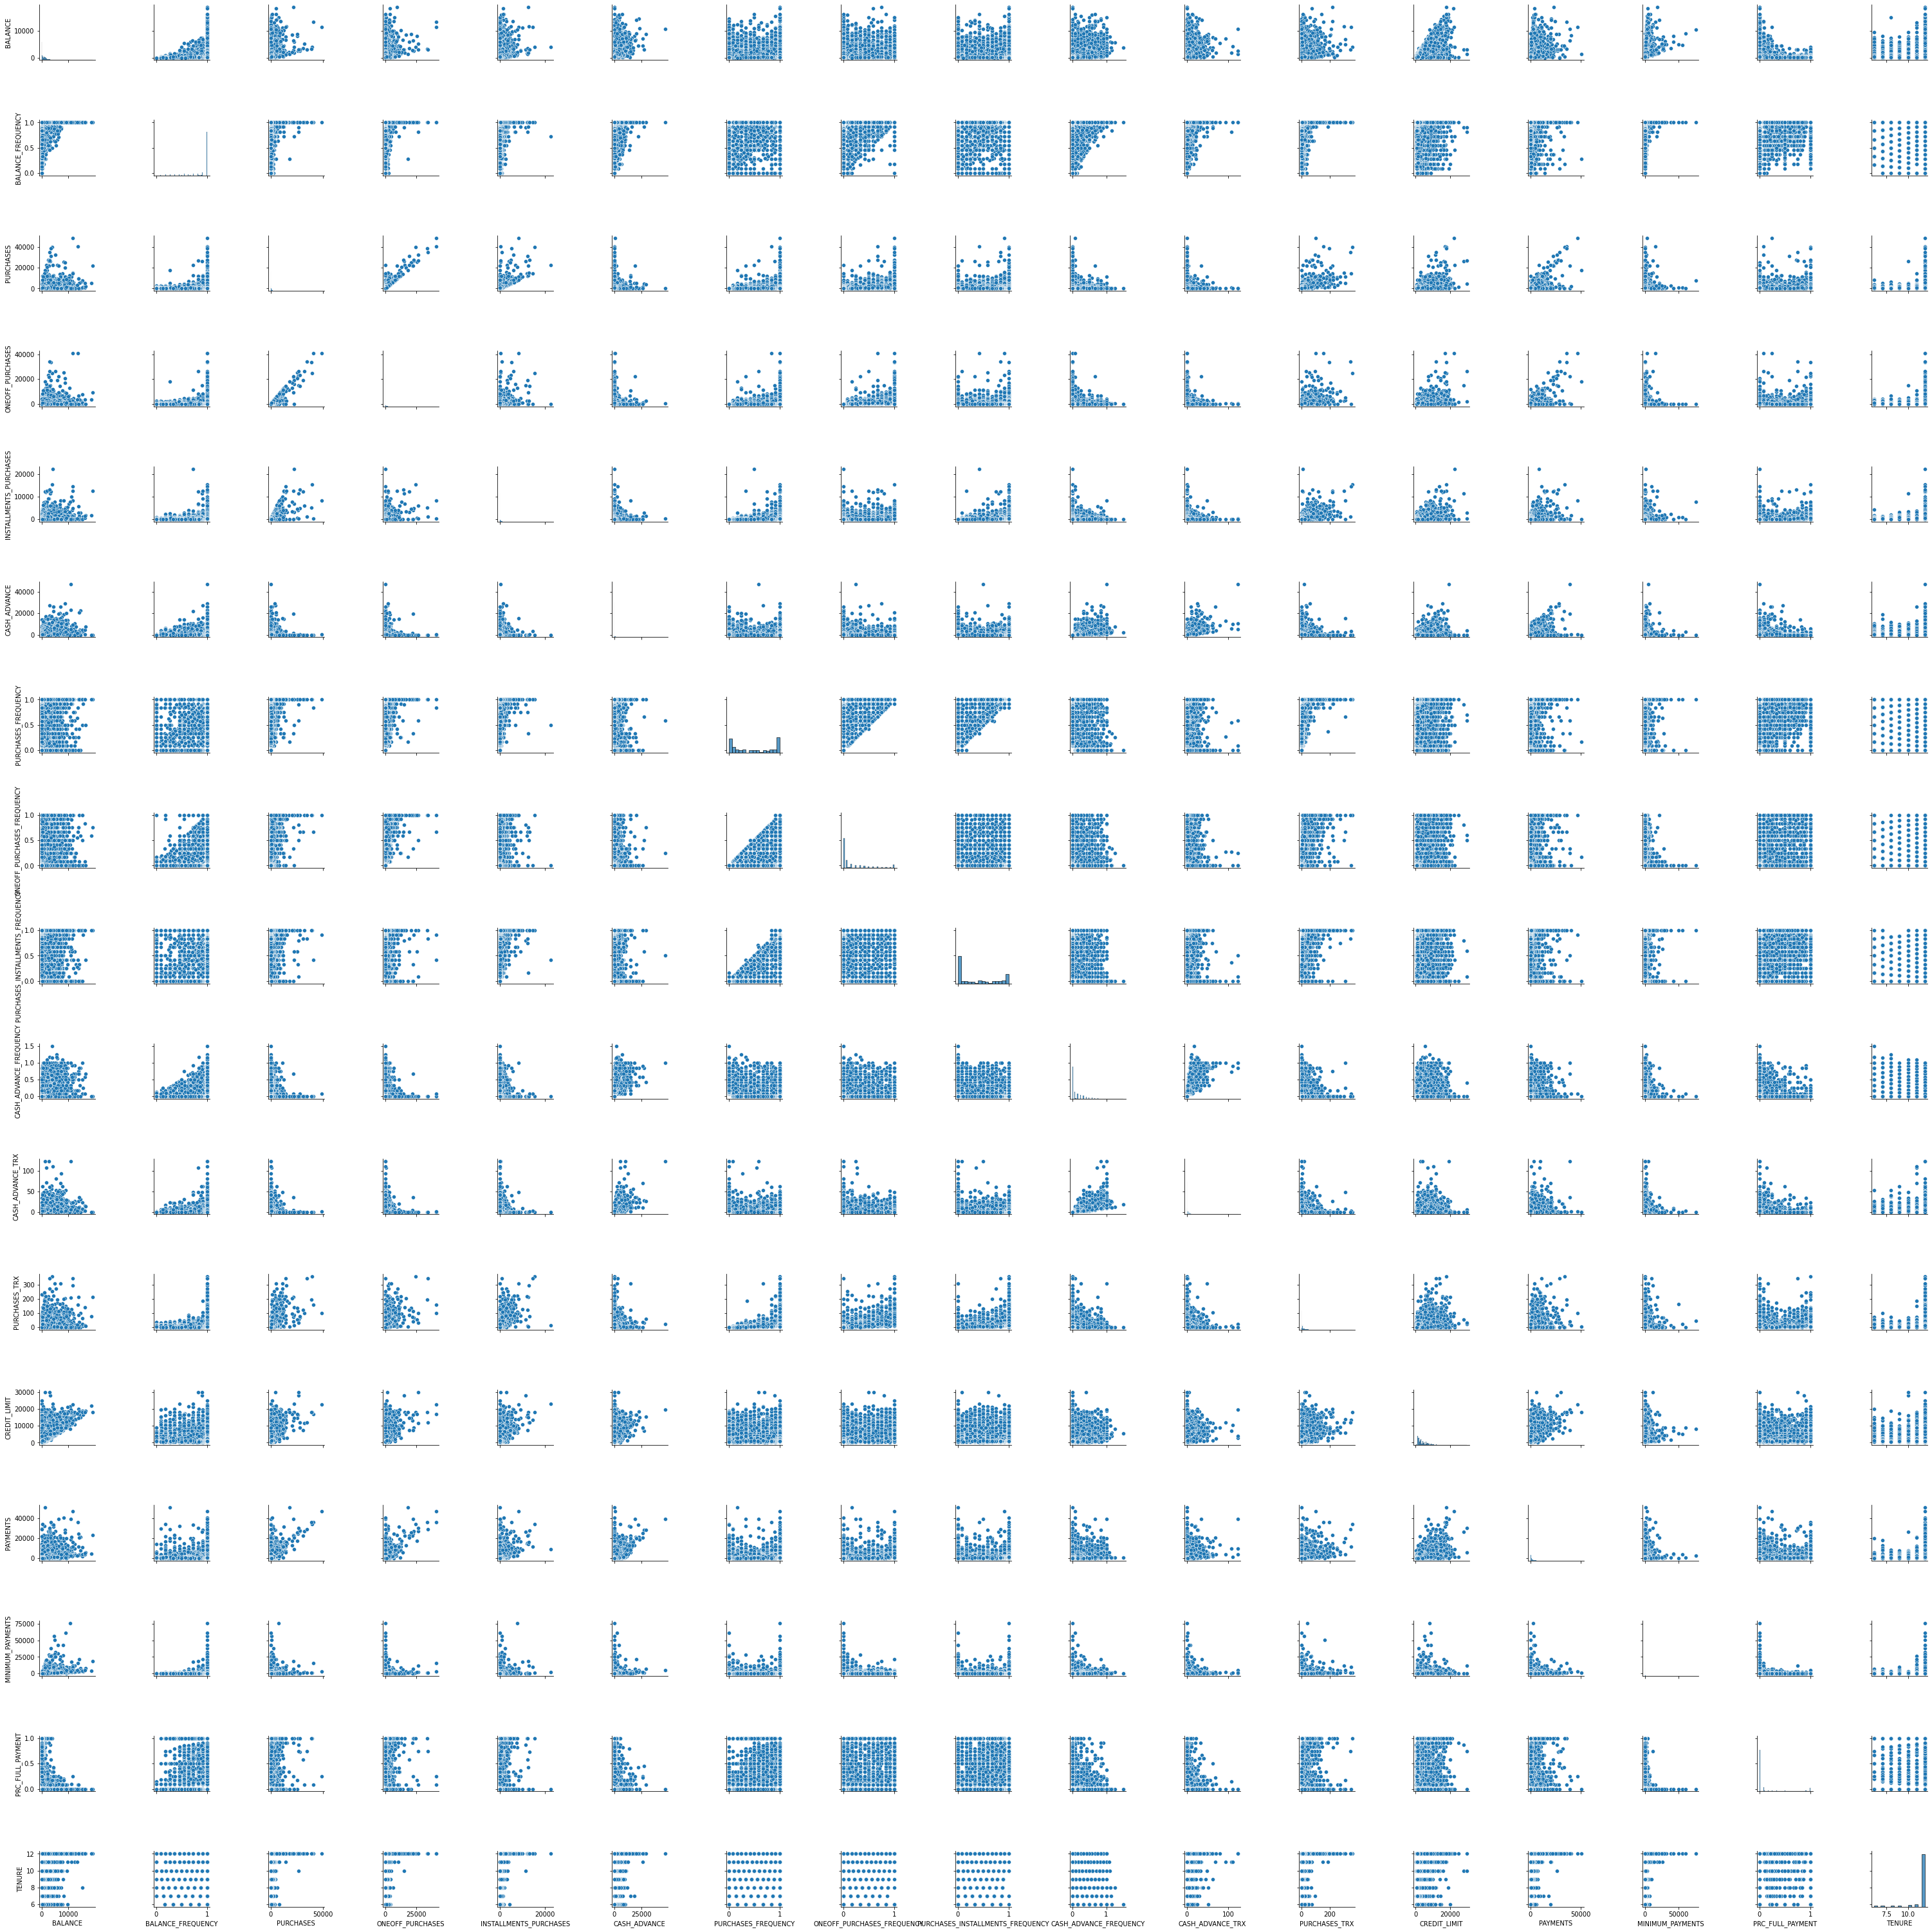

In [ ]:
sns.pairplot(df)

1.There is a linear relation between purchases and oneoff_purchases and installment_purchases.

2.cash_advance and purchase_trx have inverse releation.

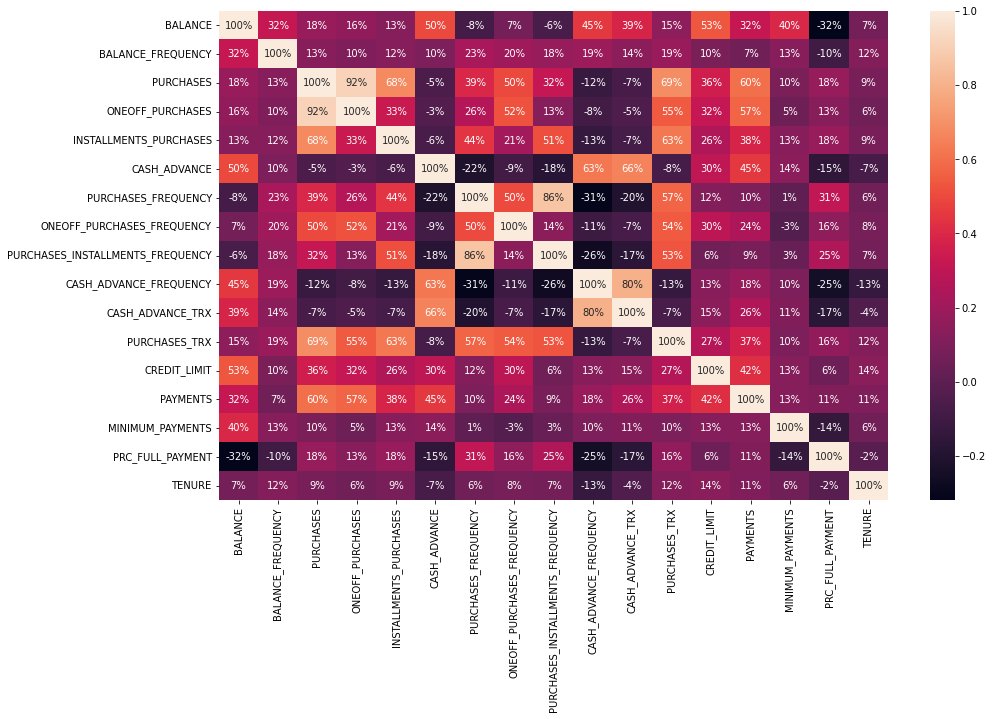

In [ ]:
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(),annot=True,fmt='.0%')



*  purchases ,oneoff_purchases,installment_purchases are highly correlated.
*  Most purchases are oneoff_purchases .
*   Prc_Full_Payment and Balance have negative correlation. 
*credit_limit and balance of user is positive correlated.






In [ ]:
#log transformation to deal with skewed data and outliers
for col in df:
    df[col]= np.log(1 + df[col])

In [ ]:
#round to the nearest decimal point
df.round(1)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.7,0.6,4.6,0.0,4.6,0.0,0.2,0.0,0.1,0.0,0.0,1.1,6.9,5.3,4.9,0.0,2.6
1,8.1,0.6,0.0,0.0,0.0,8.8,0.0,0.0,0.0,0.2,1.6,0.0,8.9,8.3,7.0,0.2,2.6
2,7.8,0.7,6.7,6.7,0.0,0.0,0.7,0.7,0.0,0.0,0.0,2.6,8.9,6.4,6.4,0.0,2.6
3,7.4,0.5,7.3,7.3,0.0,5.3,0.1,0.1,0.0,0.1,0.7,0.7,8.9,0.0,5.7,0.0,2.6
4,6.7,0.7,2.8,2.8,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.7,7.1,6.5,5.5,0.0,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,3.4,0.7,5.7,0.0,5.7,0.0,0.7,0.0,0.6,0.0,0.0,1.9,6.9,5.8,3.9,0.4,1.9
8946,3.0,0.7,5.7,0.0,5.7,0.0,0.7,0.0,0.6,0.0,0.0,1.9,6.9,5.6,5.7,0.0,1.9
8947,3.2,0.6,5.0,0.0,5.0,0.0,0.6,0.0,0.5,0.0,0.0,1.8,6.9,4.4,4.4,0.2,1.9
8948,2.7,0.6,0.0,0.0,0.0,3.6,0.0,0.0,0.0,0.2,1.1,0.0,6.2,4.0,4.0,0.2,1.9


# After Log transformation

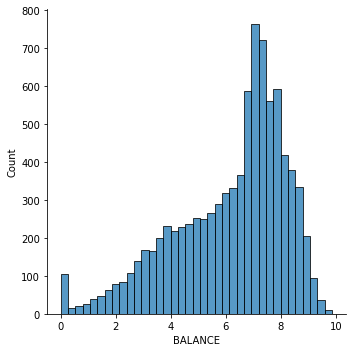

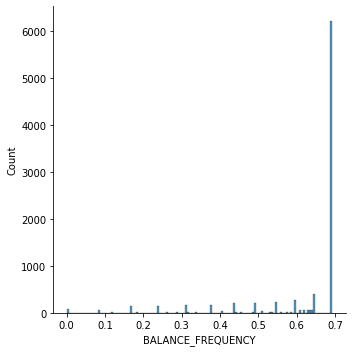

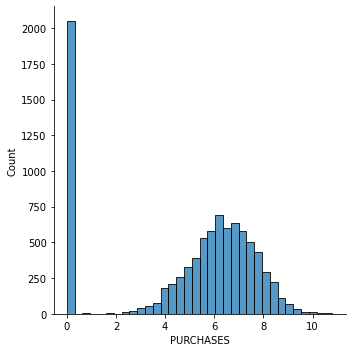

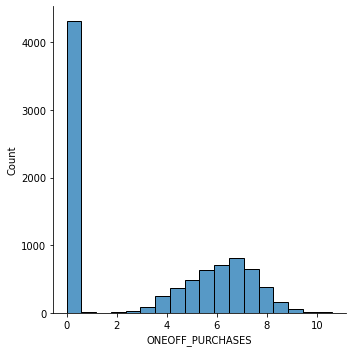

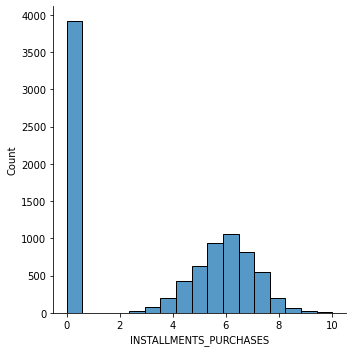

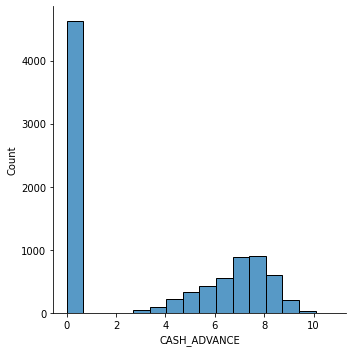

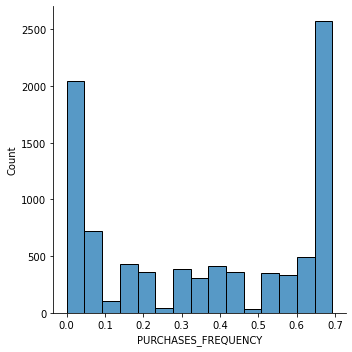

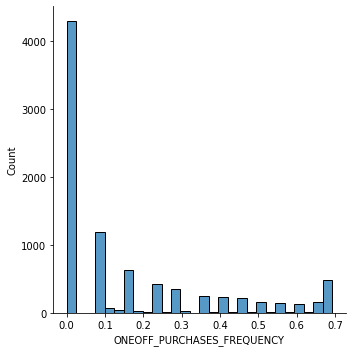

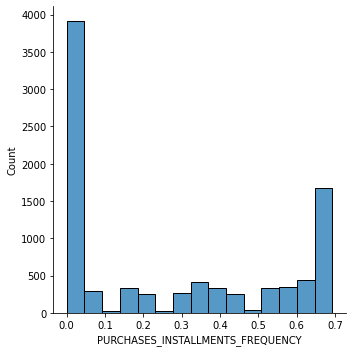

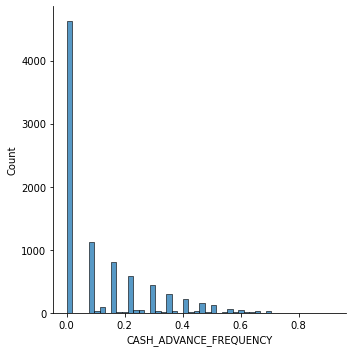

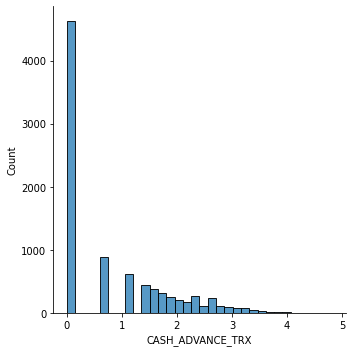

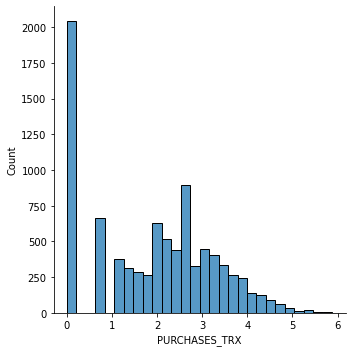

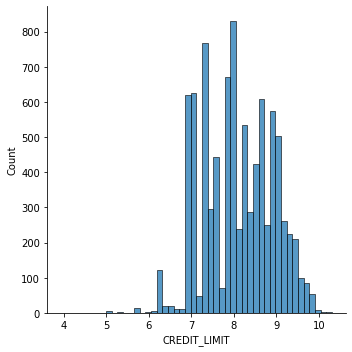

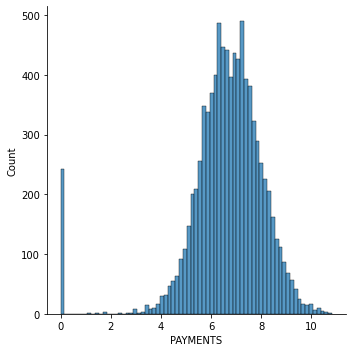

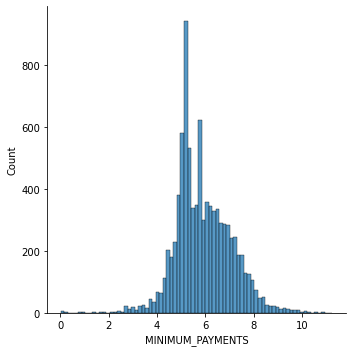

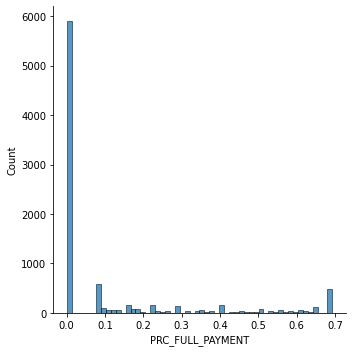

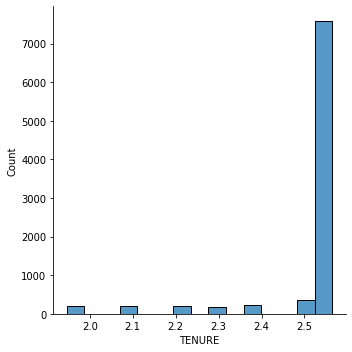

In [ ]:
for column in df.columns:
    
    sns.displot(x=df[column])
    plt.show()

# Elbow method

In [ ]:
from sklearn.cluster import KMeans

clusters = 20
square_distance = []
for i in range(1,clusters):
    KM_model = KMeans(i, init='k-means++', n_init=15, max_iter=400)
    KM_model.fit(df)
    square_distance.append(KM_model.inertia_)
    
square_distance

[475333.0004963159,
 295150.50904293015,
 217262.02868933085,
 163039.32997791428,
 131682.89286596572,
 112403.81047081336,
 99566.32718641477,
 92145.13375844609,
 85590.29549058573,
 80341.23835894388,
 75520.5434452352,
 72501.04521139187,
 69699.19722383254,
 67451.47285285279,
 64656.070854578924,
 63566.11810362939,
 60984.13205623528,
 58737.85018709606,
 57256.04758774829]

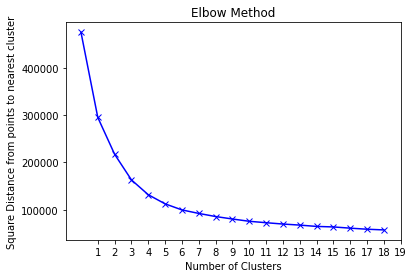

In [ ]:
ax , fig = plt.subplots()
ax = plt.plot(square_distance , 'bx-')
plt.xticks(range(1,20,1))
plt.xlabel("Number of Clusters")
plt.ylabel("Square Distance from points to nearest cluster")
plt.title("Elbow Method")
plt.show()


# K-Means

In [ ]:
KM_model = KMeans(4, init='k-means++', n_init=15, max_iter=400)
KM_model.fit(df)

KMeans(max_iter=400, n_clusters=4, n_init=15)

In [ ]:
clustered_data = pd.concat( [df,pd.DataFrame({'Cluster':KM_model.labels_})] , axis=1)
clustered_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949,2
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949,0
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949,3
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,5.747301,0.000000,2.564949,1
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949,3


In [ ]:
clustered_data['Cluster'].value_counts()

3    2755
0    2133
1    2086
2    1976
Name: Cluster, dtype: int64

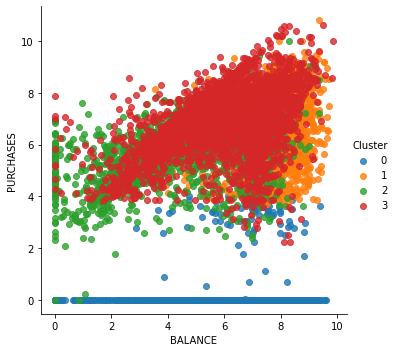

In [ ]:
sns.lmplot(x='BALANCE',y='PURCHASES',data=clustered_data,hue='Cluster',fit_reg=False)

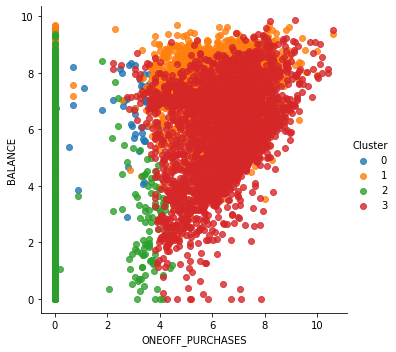

In [ ]:
sns.lmplot(x='ONEOFF_PURCHASES',y='BALANCE',data=clustered_data,hue='Cluster',fit_reg=False)

# DB scan

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2,min_samples=6)
dbscan.fit(df)
y_dbscan_pred = dbscan.labels_
y_dbscan_pred

array([0, 1, 2, ..., 0, 1, 6])

In [ ]:
dbscan_df = pd.DataFrame(df,columns = df.columns)
dbscan_df['clusters'] = y_dbscan_pred
dbscan_df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949,0
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949,1
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949,2
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,5.747301,0.000000,2.564949,-1
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949,2
5,7.501540,0.693147,7.196147,0.000000,7.196147,0.000000,0.510826,0.000000,0.459532,0.000000,0.000000,2.197225,7.496097,7.244983,7.786654,0.000000,2.564949,0
6,6.442955,0.693147,8.866724,8.764620,6.535793,0.000000,0.693147,0.693147,0.693147,0.000000,0.000000,4.174387,9.510519,8.757047,5.293636,0.693147,2.564949,3
7,7.509145,0.693147,6.080391,0.000000,6.080391,0.000000,0.693147,0.000000,0.693147,0.000000,0.000000,2.564949,7.741099,6.522189,6.278585,0.000000,2.564949,0
8,6.923556,0.693147,6.759824,6.496005,5.303305,0.000000,0.287682,0.080042,0.223144,0.000000,0.000000,1.791759,8.853808,6.535645,5.746086,0.000000,2.564949,3
9,5.031914,0.435318,7.156645,7.156645,0.000000,0.000000,0.154151,0.154151,0.000000,0.000000,0.000000,1.386294,9.305741,7.061138,4.618109,0.000000,2.564949,2


In [ ]:
dbscan_df['clusters'].value_counts()

 1     1958
 0     1718
 3     1701
 2     1000
 5      942
 6      726
 4      418
-1      305
 7       71
 9       56
 8       46
 10       9
Name: clusters, dtype: int64